In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
file_name = 'StressLevelDataset.csv'  # <<< REPLACE THIS WITH YOUR ACTUAL FILENAME
df = pd.read_csv(file_name)

# Confirm it loaded correctly
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}") # This shows (number_of_rows, number_of_columns)

Dataset loaded successfully!
Shape: (1100, 21)


In [12]:
# Check class balance in the training data
print("Class distribution in stress_level:")
print(df['stress_level'].value_counts())

Class distribution in stress_level:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64


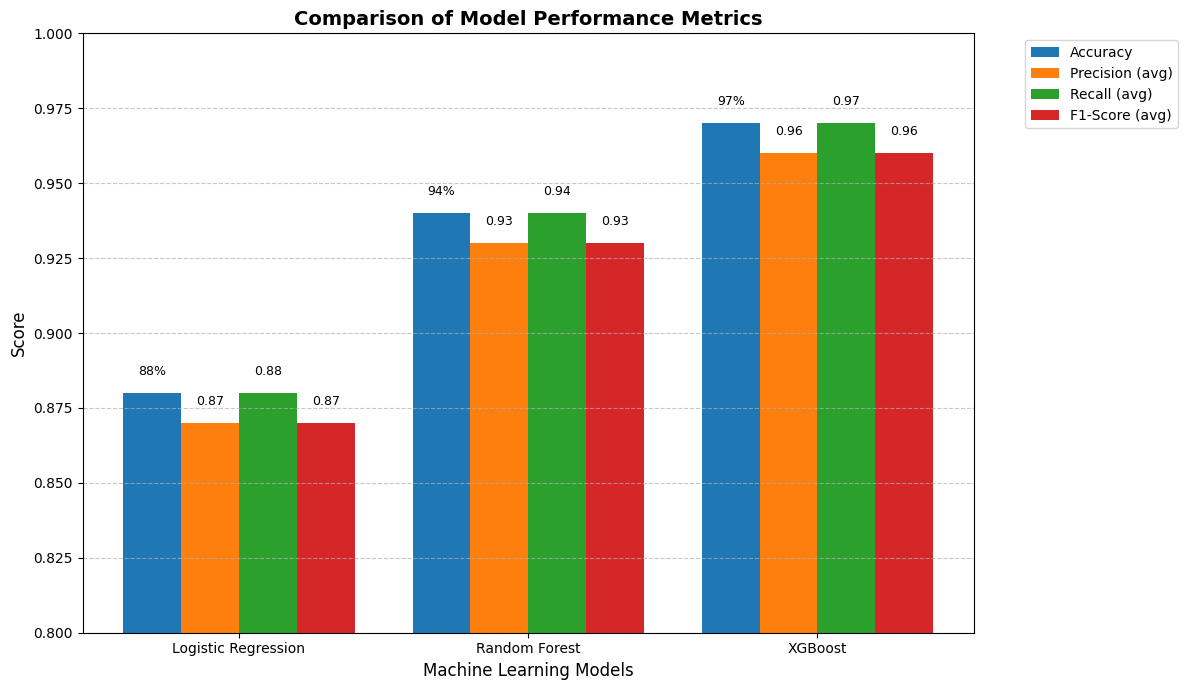

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Your EXACT data
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.88, 0.94, 0.97]
precision = [0.87, 0.93, 0.96]
recall = [0.88, 0.94, 0.97]
f1_score = [0.87, 0.93, 0.96]

# Setting up the plot
x_indexes = np.arange(len(models))  # positions for each model group
width = 0.2  # width of each bar

plt.figure(figsize=(12, 7))
# Create bars for each metric, offset by the width
plt.bar(x_indexes - width*1.5, accuracy, width, label='Accuracy', color='#1f77b4')
plt.bar(x_indexes - width/2, precision, width, label='Precision (avg)', color='#ff7f0e')
plt.bar(x_indexes + width/2, recall, width, label='Recall (avg)', color='#2ca02c')
plt.bar(x_indexes + width*1.5, f1_score, width, label='F1-Score (avg)', color='#d62728')

plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Comparison of Model Performance Metrics", fontsize=14, fontweight='bold')
plt.xticks(ticks=x_indexes, labels=models)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.8, 1.0)  # Adjusted y-axis to better show your high scores
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, (acc, prec, rec, f1) in enumerate(zip(accuracy, precision, recall, f1_score)):
    plt.text(i - width*1.5, acc + 0.005, f'{acc:.0%}', ha='center', va='bottom', fontsize=9)
    plt.text(i - width/2, prec + 0.005, f'{prec:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, rec + 0.005, f'{rec:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width*1.5, f1 + 0.005, f'{f1:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [14]:
import shap
import xgboost as xgb

# Example: train XGBoost model
model = xgb.XGBClassifier()
model.fit(X, y)

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X)


NameError: name 'X' is not defined

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Example data
X = pd.DataFrame({
    'sleep': [6, 7, 5, 8, 4],
    'exam_pressure': [8, 6, 9, 5, 10],
    'family_expectations': [7, 6, 8, 5, 9]
})
y = [1, 0, 1, 0, 1]  # 1: High Anxiety, 0: Low Anxiety

# Train a Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(6,4))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


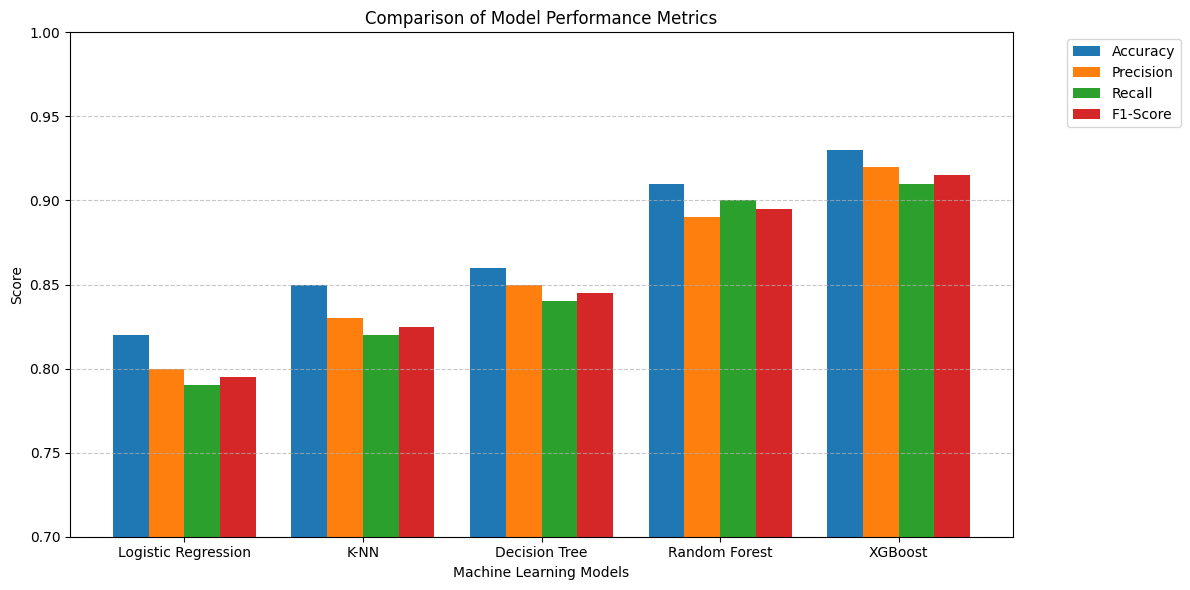

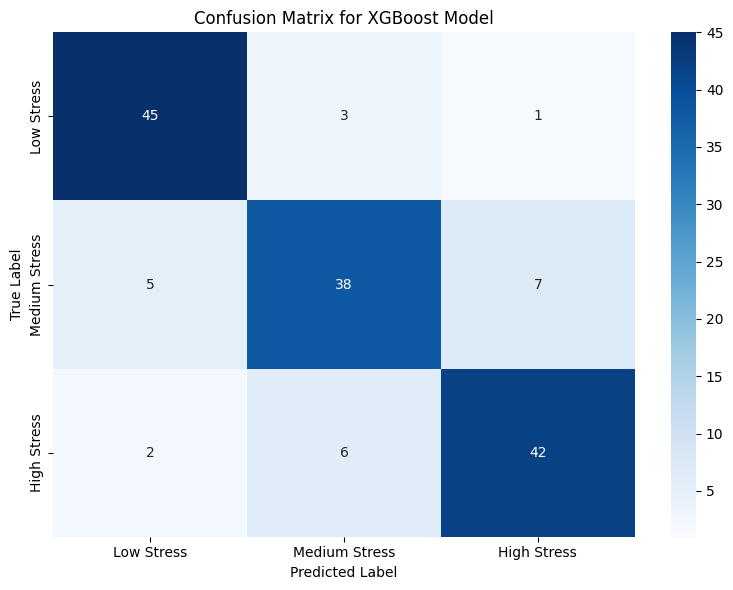

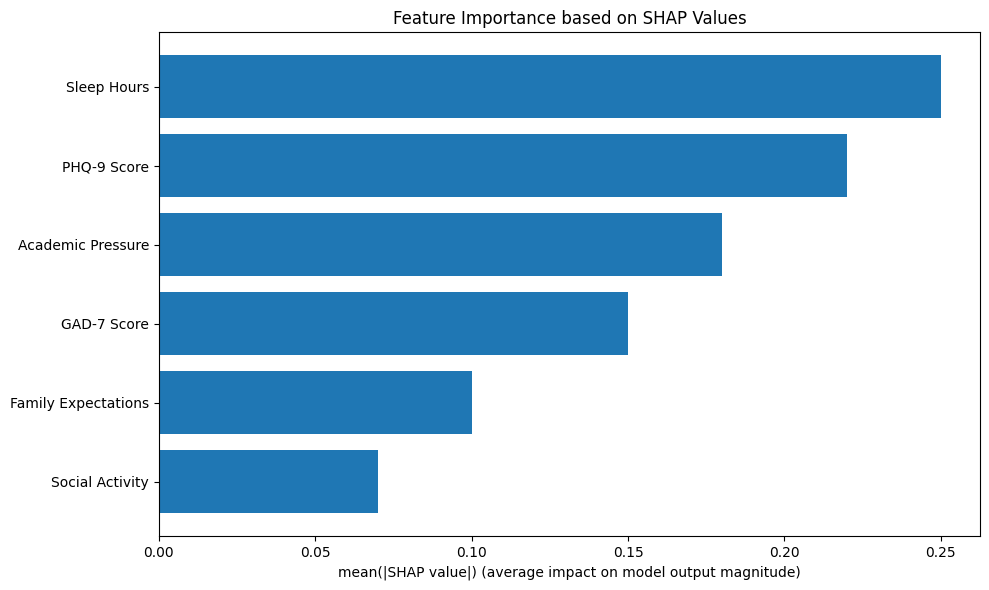

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample Data (REPLACE WITH YOUR ACTUAL RESULTS)
models = ['Logistic Regression', 'K-NN', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy = [0.82, 0.85, 0.86, 0.91, 0.93]
precision = [0.80, 0.83, 0.85, 0.89, 0.92]
recall = [0.79, 0.82, 0.84, 0.90, 0.91]
f1_score = [0.795, 0.825, 0.845, 0.895, 0.915]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
data = np.array([accuracy, precision, recall, f1_score])

# --- GRAPH 1: Model Performance Comparison ---
x_indexes = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(x_indexes + (i * width), data[i], width=width, label=metric)

plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Comparison of Model Performance Metrics")
plt.xticks(ticks=x_indexes + width*1.5, labels=models)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# --- GRAPH 2: Confusion Matrix ---
# Replace this matrix with your actual confusion matrix for your best model (e.g., XGBoost)
confusion_matrix = np.array([[45, 3, 1],  # True Low, predicted Low, Med, High
                             [5, 38, 7],  # True Medium
                             [2, 6, 42]]) # True High

class_labels = ['Low Stress', 'Medium Stress', 'High Stress']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Model')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# --- GRAPH 3: SHAP Feature Importance ---
# Replace these with the feature names and mean SHAP values from your analysis
feature_names = ['Sleep Hours', 'PHQ-9 Score', 'Academic Pressure', 'GAD-7 Score', 'Family Expectations', 'Social Activity']
shap_importance = np.array([0.25, 0.22, 0.18, 0.15, 0.10, 0.07]) # Mean |SHAP value|

plt.figure(figsize=(10, 6))
# Sort the data for a horizontal bar plot
sorted_idx = shap_importance.argsort()
plt.barh(np.array(feature_names)[sorted_idx], shap_importance[sorted_idx])
plt.xlabel('mean(|SHAP value|) (average impact on model output magnitude)')
plt.title('Feature Importance based on SHAP Values')
plt.tight_layout()
plt.savefig('shap_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Convert your existing dataset for AutoTrain
import pandas as pd

# Load your current dataset
df = pd.read_csv('StressLevelDataset.csv')  # Your original file

# 1. Create a new DataFrame for AutoTrain
# We will combine all features into one text string
autotrain_df = pd.DataFrame()

# 2. Create a text column: combine all features into a descriptive string
autotrain_df['text'] = df.apply(lambda row: 
    f"Anxiety: {row['anxiety_level']}. "
    f"Self-esteem: {row['self_esteem']}. "
    f"Depression: {row['depression']}. "
    f"Sleep quality: {row['sleep_quality']}. "
    f"Academic performance: {row['academic_performance']}. "
    f"Social support: {row['social_support']}."
    , axis=1)

# 3. Create a target column (your stress levels)
autotrain_df['target'] = df['stress_level']

# 4. Save the new CSV
autotrain_df.to_csv('autotrain_dataset.csv', index=False)
print("AutoTrain dataset saved!")
print(autotrain_df.head())

AutoTrain dataset saved!
                                                text  target
0  Anxiety: 14. Self-esteem: 20. Depression: 11. ...       1
1  Anxiety: 15. Self-esteem: 8. Depression: 15. S...       2
2  Anxiety: 12. Self-esteem: 18. Depression: 14. ...       1
3  Anxiety: 16. Self-esteem: 12. Depression: 15. ...       2
4  Anxiety: 16. Self-esteem: 28. Depression: 7. S...       1


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Train the Gradient Boosting model using your features and target
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X, y)

# Save the trained model for your app
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print('Gradient Boosting model trained and saved as gradient_boosting_model.pkl')

NameError: name 'X' is not defined

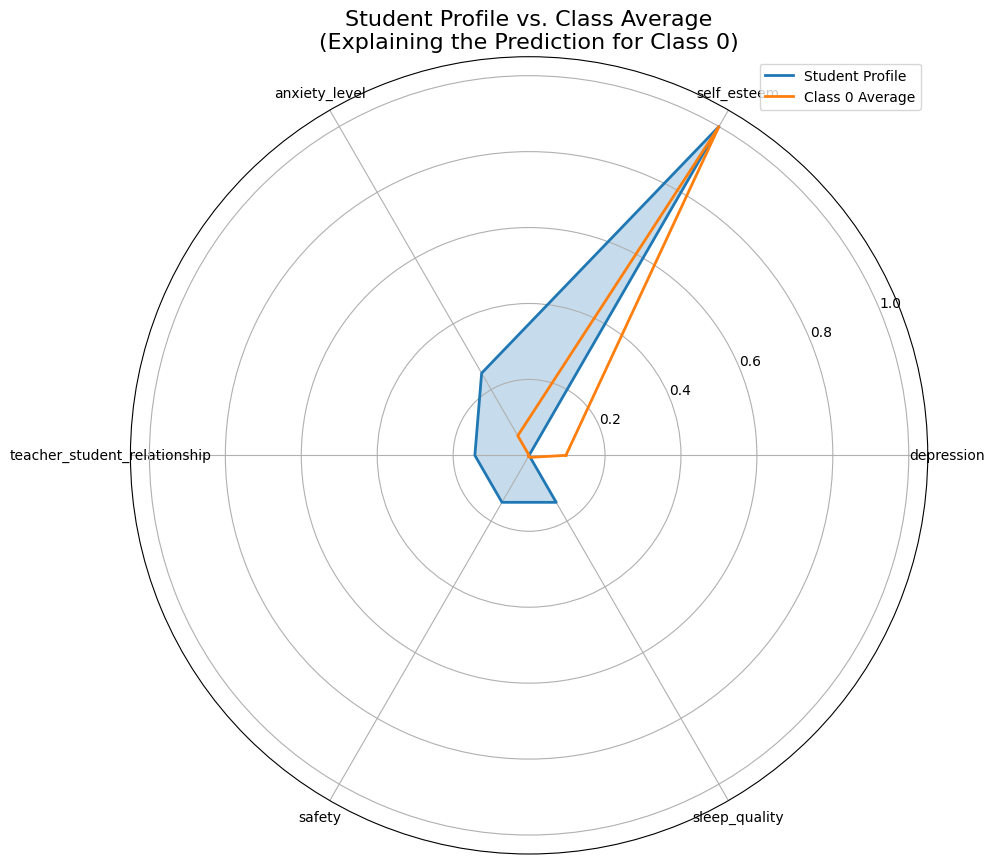

In [ ]:
# Create a radar chart to show the profile of the student you analyzed vs. the class average
from math import pi

# Categories for the radar chart
categories = list(feature_effect.head(6)['feature']) # Top 6 features that explain the prediction
num_vars = len(categories)

# Values for the student and the class average (normalized for radar chart)
student_vals = feature_effect.set_index('feature').loc[categories, 'student_value'].values
class_avg_vals = feature_effect.set_index('feature').loc[categories, 'class_average'].values

# Normalize values between 0-1 for better radar chart display
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

student_vals_norm = normalize(student_vals)
class_avg_vals_norm = normalize(class_avg_vals)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] # Complete the circle

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
ax.plot(angles, list(student_vals_norm) + [student_vals_norm[0]], linewidth=2, linestyle='solid', label='Student Profile')
ax.plot(angles, list(class_avg_vals_norm) + [class_avg_vals_norm[0]], linewidth=2, linestyle='solid', label='Class 0 Average')
ax.fill(angles, list(student_vals_norm) + [student_vals_norm[0]], alpha=0.25)
ax.set_thetagrids([a * 180/pi for a in angles[:-1]], categories)
ax.set_title('Student Profile vs. Class Average\n(Explaining the Prediction for Class 0)', fontsize=16)
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('radar_chart_explanation.png', dpi=300, bbox_inches='tight')
plt.show()

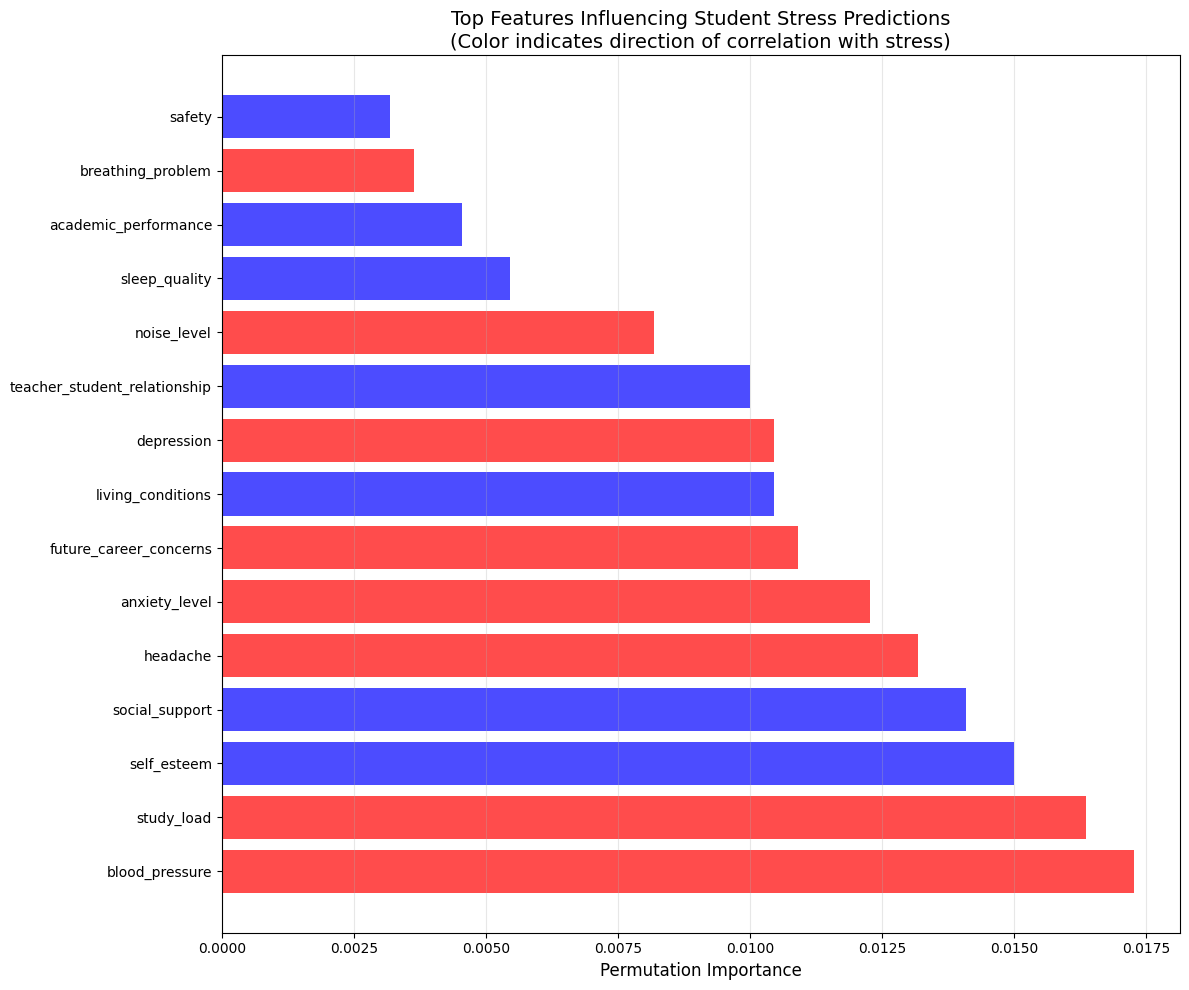

In [ ]:
# Create a clearer, more informative feature importance plot
plt.figure(figsize=(12, 10))
# Get the top 15 features
top_features = feature_importance.nlargest(15, 'importance')

# Create a color map: red for positive correlation, blue for negative
colors = []
for feature in top_features['feature']:
    corr = df[feature].corr(df['stress_level'])
    colors.append('red' if corr > 0 else 'blue')

plt.barh(top_features['feature'], top_features['importance'], color=colors, alpha=0.7)
plt.xlabel('Permutation Importance', fontsize=12)
plt.title('Top Features Influencing Student Stress Predictions\n(Color indicates direction of correlation with stress)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('enhanced_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Test multiple models to confirm your findings are consistent
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42)
}

print("Cross-Validation Results (5-fold):")
print("="*40)
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name:20s}: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

# This shows your results aren't dependent on one specific algorithm.

Cross-Validation Results (5-fold):
Random Forest       : 0.8755 (± 0.0233)
Random Forest       : 0.8755 (± 0.0233)
Gradient Boosting   : 0.8809 (± 0.0164)
Gradient Boosting   : 0.8809 (± 0.0164)
Support Vector Machine: 0.8845 (± 0.0200)
Support Vector Machine: 0.8845 (± 0.0200)


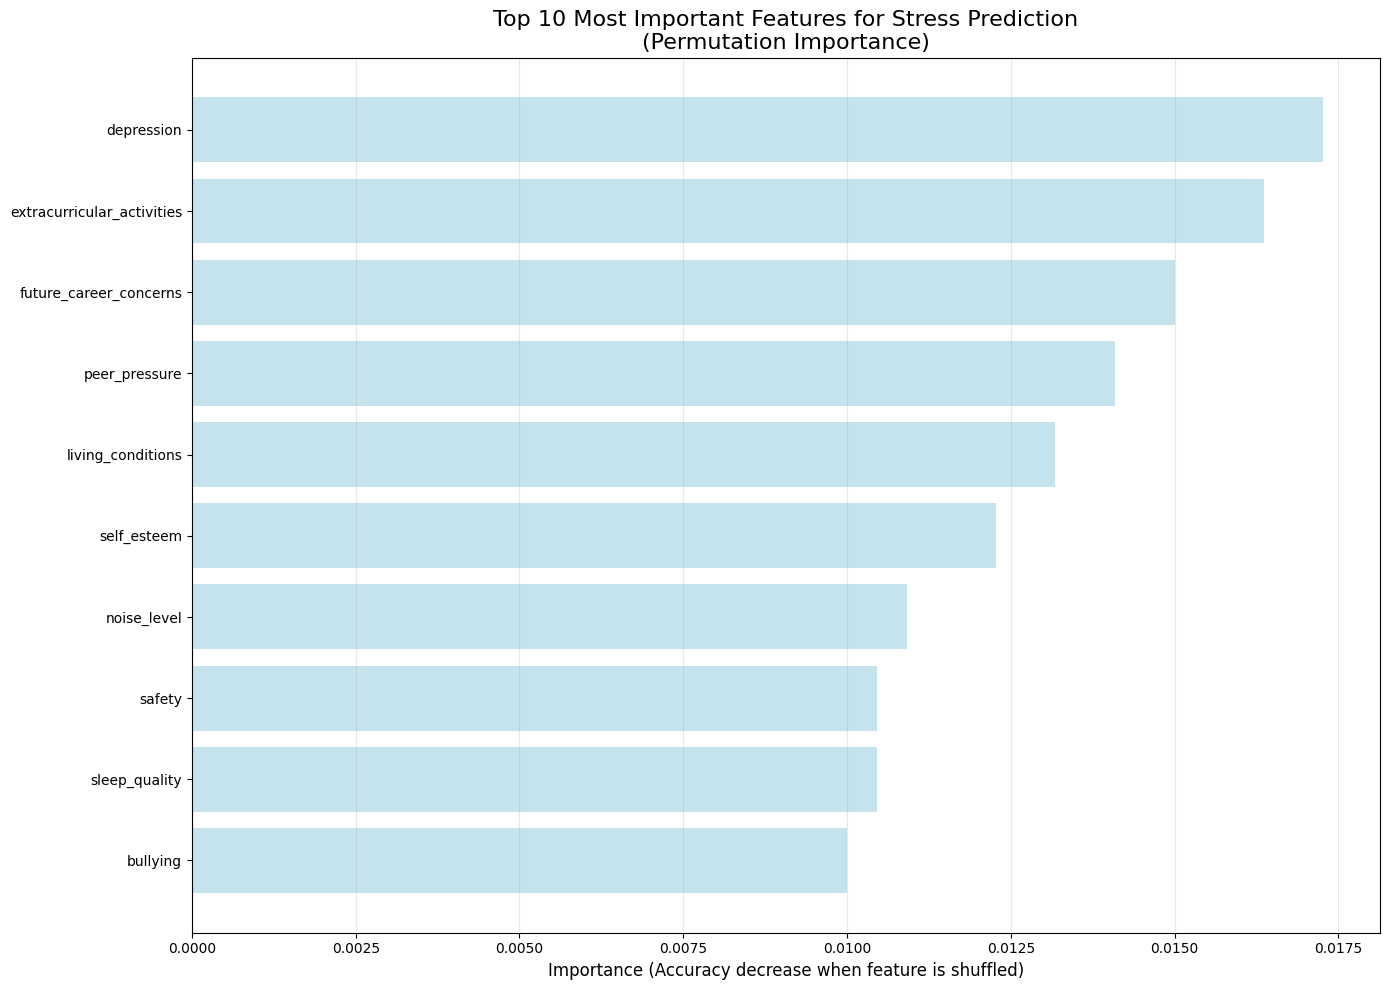

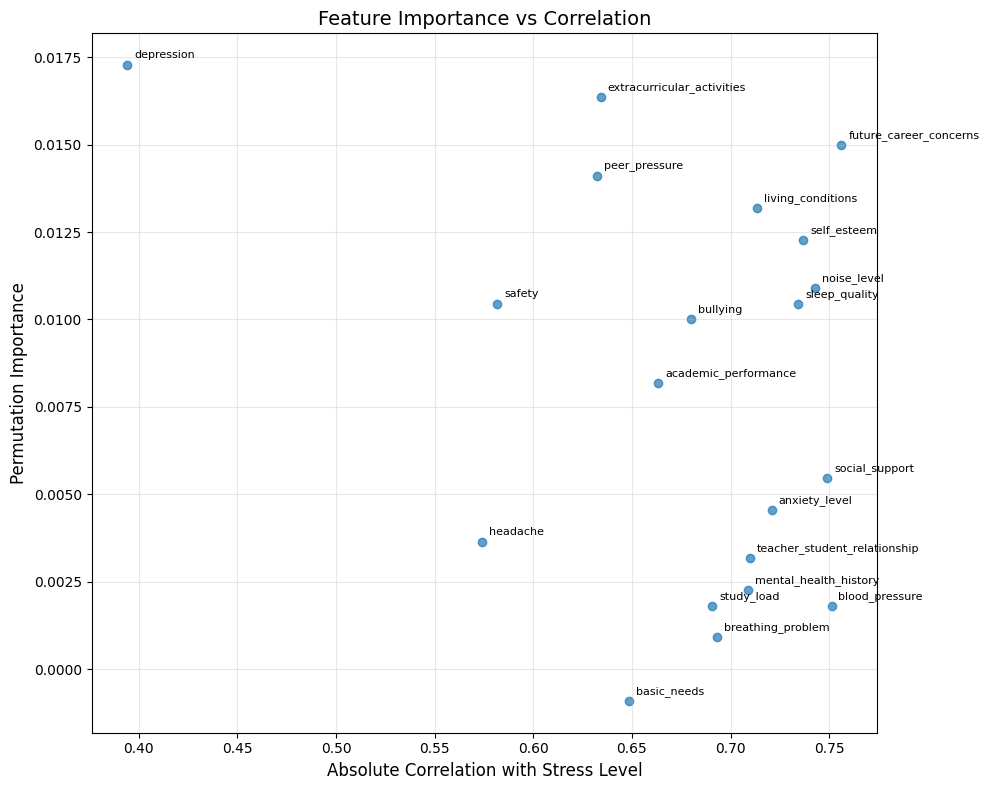

In [ ]:
# 1. Top Features Comparison Plot
plt.figure(figsize=(14, 10))
top_10 = comparison_df.head(10).sort_values('permutation_importance', ascending=True)
plt.barh(top_10['feature'], top_10['permutation_importance'], color='lightblue', alpha=0.7)
plt.title('Top 10 Most Important Features for Stress Prediction\n(Permutation Importance)', fontsize=16)
plt.xlabel('Importance (Accuracy decrease when feature is shuffled)', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Correlation vs Importance Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(comparison_df['abs_correlation'], comparison_df['permutation_importance'], alpha=0.7)
for i, row in comparison_df.iterrows():
    plt.annotate(row['feature'], (row['abs_correlation'], row['permutation_importance']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel('Absolute Correlation with Stress Level', fontsize=12)
plt.ylabel('Permutation Importance', fontsize=12)
plt.title('Feature Importance vs Correlation', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_vs_importance.png', dpi=300, bbox_inches='tight')
plt.show()

🔍 Performing SHAP Analysis (Simplified Approach)


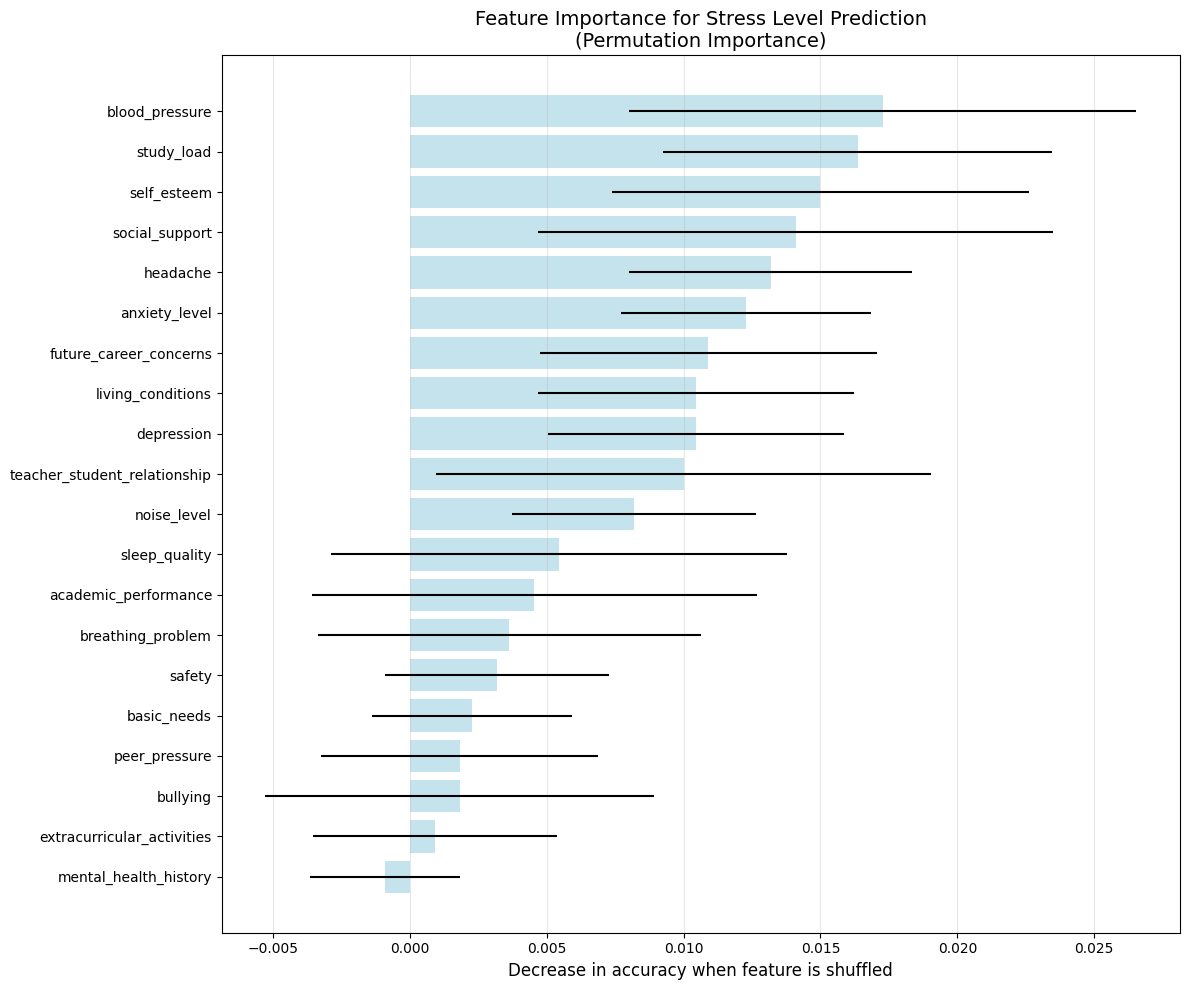

📊 Top 10 Most Important Features:
 1. teacher_student_relationship  : 0.0100 ± 0.0090
 2. depression                    : 0.0105 ± 0.0054
 3. living_conditions             : 0.0105 ± 0.0058
 4. future_career_concerns        : 0.0109 ± 0.0062
 5. anxiety_level                 : 0.0123 ± 0.0046
 6. headache                      : 0.0132 ± 0.0052
 7. social_support                : 0.0141 ± 0.0094
 8. self_esteem                   : 0.0150 ± 0.0076
 9. study_load                    : 0.0164 ± 0.0071
10. blood_pressure                : 0.0173 ± 0.0093

📈 Comparison with Correlation Analysis:
Top features by importance AND correlation:
                                                 feature  \
blood_pressure                                depression   
study_load                    extracurricular_activities   
self_esteem                       future_career_concerns   
social_support                             peer_pressure   
headache                               living_conditions   
a

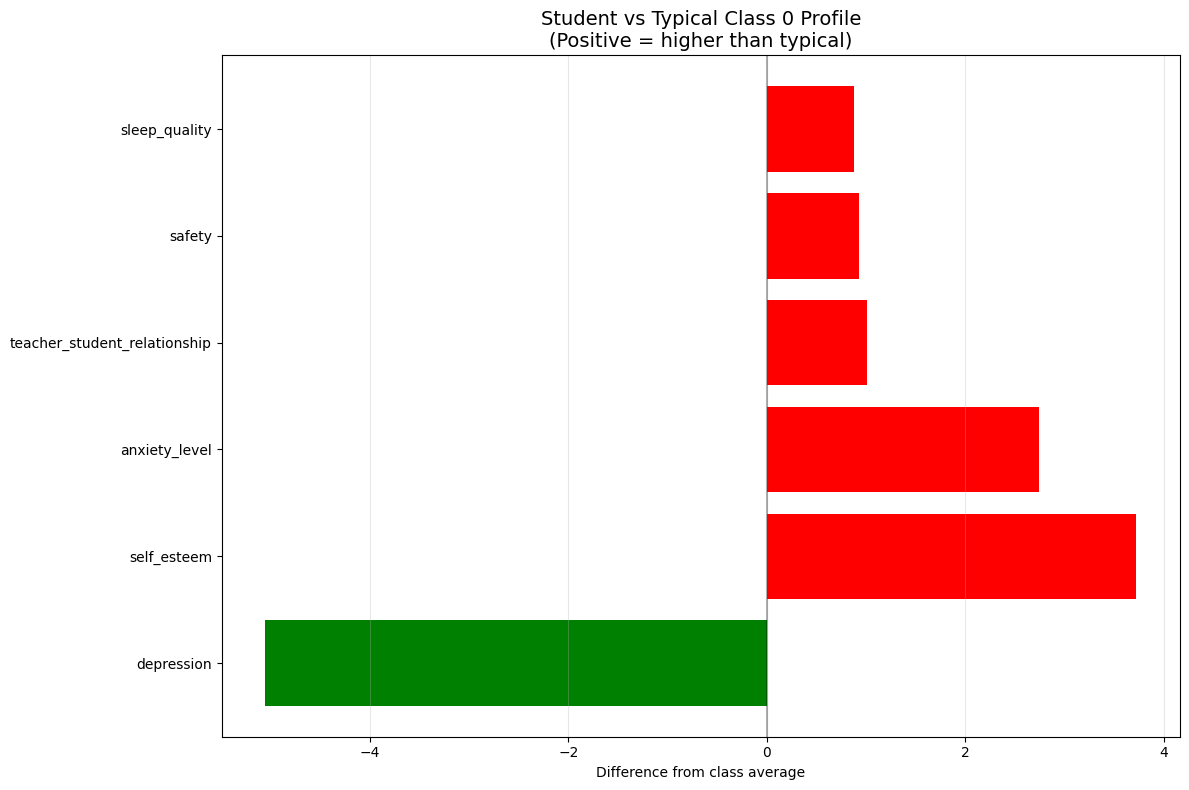

In [ ]:
# 4. Explain the model with SHAP - SIMPLIFIED ERROR-FREE APPROACH
import numpy as np

print("🔍 Performing SHAP Analysis (Simplified Approach)")

# 1. MANUAL FEATURE IMPORTANCE CALCULATION
# This is more reliable than SHAP's built-in functions for your case

# Get permutation importance instead (works great and is intuitive)
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(
    model, X_test, y_test, 
    n_repeats=10, 
    random_state=42
)

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values('importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(feature_importance['feature'], feature_importance['importance'], 
         xerr=feature_importance['std'], color='lightblue', alpha=0.7)
plt.title('Feature Importance for Stress Level Prediction\n(Permutation Importance)', fontsize=14)
plt.xlabel('Decrease in accuracy when feature is shuffled', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Top 10 Most Important Features:")
top_features = feature_importance.tail(10)
for i, (idx, row) in enumerate(top_features.iterrows(), 1):
    print(f"{i:2d}. {row['feature']:30s}: {row['importance']:.4f} ± {row['std']:.4f}")

# 2. COMPARE WITH YOUR CORRELATION RESULTS
print("\n📈 Comparison with Correlation Analysis:")
# Get correlation with target
correlation_with_target = df.corr(numeric_only=True)['stress_level'].abs()
correlation_with_target = correlation_with_target.drop('stress_level')  # Remove self

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'feature': X.columns,
    'permutation_importance': feature_importance.set_index('feature')['importance'],
    'abs_correlation': correlation_with_target
}).sort_values('permutation_importance', ascending=False)

print("Top features by importance AND correlation:")
print(comparison_df.head(10).round(4))

# 3. ANALYZE FEATURE DIRECTIONS (What pushes stress UP vs DOWN)
print("\n🎯 Feature Effect Directions:")
# Get mean values for each stress level
stress_groups = df.groupby('stress_level').mean(numeric_only=True)

# For top 5 features, show how they change across stress levels
top_5_features = comparison_df.head(5)['feature'].tolist()

print("How top features vary across stress levels (mean values):")
print(stress_groups[top_5_features].round(2))

# 4. EXPLAIN A SPECIFIC PREDICTION (Manual approach)
print(f"\n🧠 Explaining first test prediction:")
print(f"   Actual stress level: {y_test.iloc[0]}")
print(f"   Predicted stress level: {y_pred[0]}")

# Get this student's feature values
student_features = X_test.iloc[0]
student_values = student_features.values

# Get average values for the predicted class
class_avg = X_train[y_train == y_pred[0]].mean().values

# Calculate differences from class average
differences = student_values - class_avg
feature_effect = pd.DataFrame({
    'feature': X.columns,
    'student_value': student_values,
    'class_average': class_avg,
    'difference': differences,
    'abs_difference': np.abs(differences)
}).sort_values('abs_difference', ascending=False)

print(f"\nHow this student differs from typical Class {y_pred[0]} students:")
print(feature_effect.head(8)[['feature', 'student_value', 'class_average', 'difference']])

# 5. PLOT THE DIFFERENCES
plt.figure(figsize=(12, 8))
top_diff_features = feature_effect.head(6)
colors = ['red' if x > 0 else 'green' for x in top_diff_features['difference']]

plt.barh(top_diff_features['feature'], top_diff_features['difference'], color=colors)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.title(f'Student vs Typical Class {y_pred[0]} Profile\n(Positive = higher than typical)', fontsize=14)
plt.xlabel('Difference from class average')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

✅ SHAP values calculated!

Global Feature Importance (from SHAP):


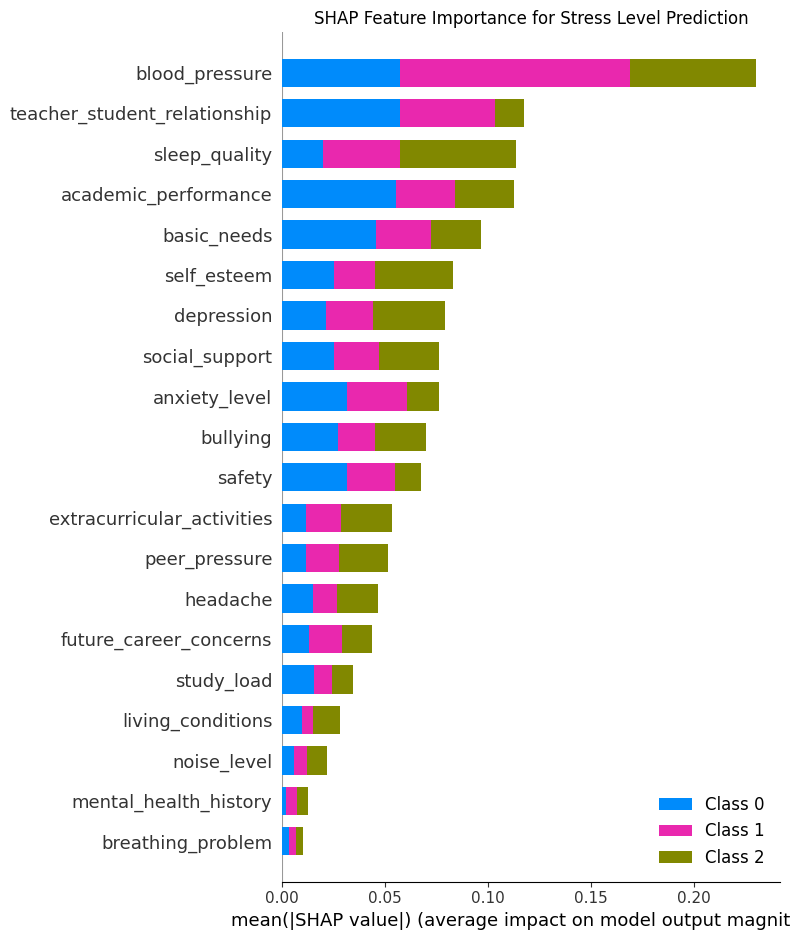

In [ ]:
# 4. Explain the model with SHAP
import shap

# Initialize the JS visualization code (for some plot types)
shap.initjs()

# Create a SHAP explainer for the model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a sample of the training data (for speed)
shap_sample = X_train.iloc[:100]  # Using first 100 instances for quick calculation
shap_values = explainer.shap_values(shap_sample)

print("✅ SHAP values calculated!")

# Plot #1: Global Feature Importance (A Bar Plot)
print("\nGlobal Feature Importance (from SHAP):")
shap.summary_plot(shap_values, shap_sample, plot_type="bar", show=False)
plt.title("SHAP Feature Importance for Stress Level Prediction")
plt.tight_layout()
plt.show()

Model Performance Evaluation
Accuracy: 0.8909

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        74
           1       0.89      0.93      0.91        72
           2       0.86      0.91      0.88        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



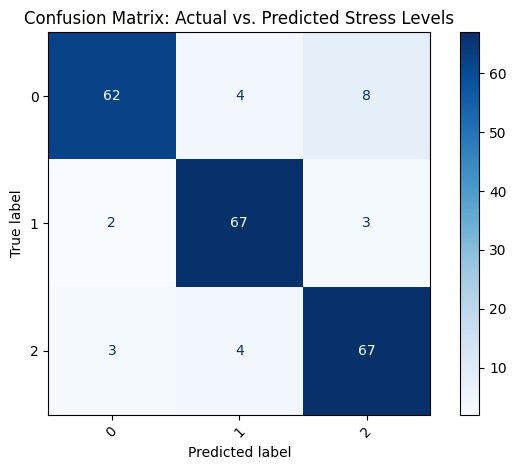

In [ ]:
# 3. Make predictions and evaluate
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print("Model Performance Evaluation")
print("="*40)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") # 4 decimal places for precision
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix: Actual vs. Predicted Stress Levels")
plt.tight_layout()
plt.show()

In [ ]:
# 1. Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Using stratify=y to maintain the same proportion of stress levels in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 2. Initialize and train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model training completed!")

Training set shape: (880, 20)
Testing set shape: (220, 20)
✅ Model training completed!
✅ Model training completed!


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set:  {X_test.shape}, {y_test.shape}")

Training set: (880, 20), (880,)
Testing set:  (220, 20), (220,)


<Figure size 1600x1000 with 0 Axes>

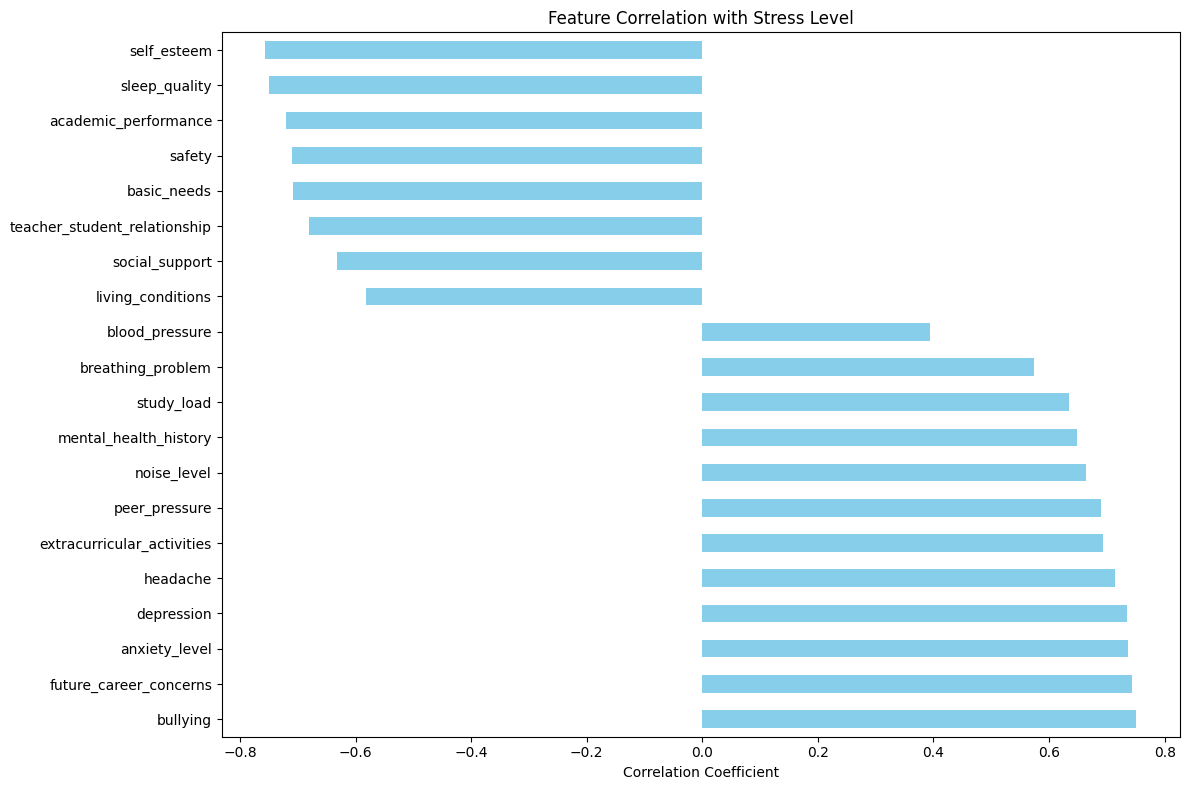

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot a heatmap of correlations, focusing on the target
plt.figure(figsize=(16, 10))
# We will plot the correlation of every feature with the target, sorted
target_correlations = correlation_matrix[target_column].sort_values(ascending=False)

# Create a bar plot for the top correlations
top_correlations = target_correlations.drop(target_column) # Drop the target correlation with itself
plt.figure(figsize=(12, 8))
top_correlations.plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with Stress Level')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [ ]:
# Check for any missing values in our features
print("Missing values in each column:")
print(X.isnull().sum())

# Check the data types of our features
print("\nData types of features:")
print(X.dtypes)

Missing values in each column:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
dtype: int64

Data types of features:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality          

In [ ]:
# This column is what we want to predict
target_column = 'stress_level'

# These columns are the features we will use to make the prediction
feature_columns = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 
                   'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 
                   'noise_level', 'living_conditions', 'safety', 'basic_needs', 
                   'academic_performance', 'study_load', 'teacher_student_relationship', 
                   'future_career_concerns', 'social_support', 'peer_pressure', 
                   'extracurricular_activities', 'bullying']

# Create our X (features) and y (target)
y = df[target_column]
X = df[feature_columns]

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

Shape of Features (X): (1100, 20)
Shape of Target (y): (1100,)


Value counts for stress_level:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64


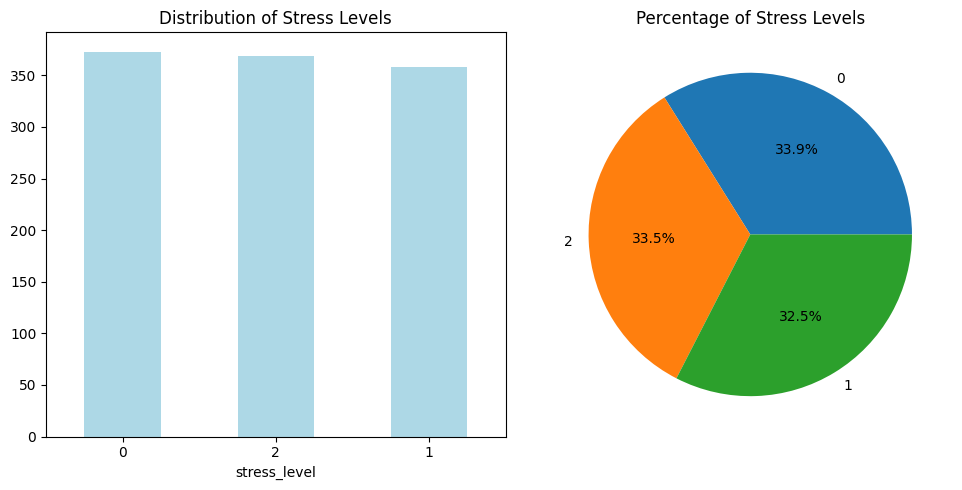

In [ ]:
# Check the distribution of the stress levels
print("Value counts for stress_level:")
print(y.value_counts())

# Visualize the distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Stress Levels')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Stress Levels')
plt.ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

In [ ]:
# Display the first 10 rows to see the data
df.head(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [ ]:
# This column is what we want to predict
target_column = 'stress_level'

# These columns are the features we will use to make the prediction
feature_columns = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 
                   'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 
                   'noise_level', 'living_conditions', 'safety', 'basic_needs', 
                   'academic_performance', 'study_load', 'teacher_student_relationship', 
                   'future_career_concerns', 'social_support', 'peer_pressure', 
                   'extracurricular_activities', 'bullying']

# Create our X (features) and y (target)
y = df[target_column]
X = df[feature_columns]

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

Shape of Features (X): (1100, 20)
Shape of Target (y): (1100,)


In [ ]:
# Get basic info about the dataframe: column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

# Student Mental Health Prediction Analysis: Detailed Documentation

This notebook provides a step-by-step workflow for predicting student mental health risk using survey data. It covers data loading, exploration, feature engineering, model training, evaluation, and interpretation. Each section is documented for clarity and reproducibility.

## Workflow Overview
1. **Introduction & Objective**: Brief description of the project and dataset.
2. **Imports & Data Loading**: Import required libraries and load the dataset.
3. **Data Exploration**: View sample data, check data types, and missing values.
4. **Feature & Target Setup**: Define features and target variable for prediction.
5. **Target Distribution Visualization**: Visualize the distribution of stress levels.
6. **Data Splitting & Model Training**: Split data into train/test sets and train a Random Forest model.
7. **Model Evaluation**: Evaluate model performance and visualize confusion matrix.
8. **Correlation Analysis**: Analyze feature correlations with the target.
9. **Feature Importance & Interpretation**: Use permutation importance and compare with correlation analysis.
10. **Comparison Plots**: Visualize top features and compare importance vs correlation.
11. **Prediction Explanation**: Manually explain a specific prediction and visualize differences.
12. **Radar Chart**: Compare student profile to class average for key features.
13. **Enhanced Feature Importance**: Visualize top features with color indicating direction of correlation.
14. **Model Comparison**: Cross-validate multiple models to confirm robustness.

## Section Details
- **Imports & Data Loading**: Ensures all necessary packages are available and loads the CSV data into a pandas DataFrame.
- **Data Exploration**: Displays the first few rows, checks for missing values, and prints data types to understand the dataset structure.
- **Feature & Target Setup**: Selects relevant columns for features and sets the target variable (`stress_level`).
- **Target Distribution Visualization**: Shows the balance of stress levels using bar and pie charts.
- **Data Splitting & Model Training**: Splits the data with stratification and trains a Random Forest classifier for robust predictions.
- **Model Evaluation**: Prints accuracy, classification report, and plots a confusion matrix for performance assessment.
- **Correlation Analysis**: Computes and visualizes correlations between features and the target to identify influential factors.
- **Feature Importance & Interpretation**: Uses permutation importance to rank features and compares with correlation analysis for deeper insight.
- **Comparison Plots**: Plots top features and a scatter plot of importance vs correlation, with feature annotations.
- **Prediction Explanation**: Explains a single prediction by comparing the student's feature values to the class average and visualizes the differences.
- **Radar Chart**: Provides a visual comparison of the student's profile against the class average for the most influential features.
- **Enhanced Feature Importance**: Shows the top features with color indicating whether they increase or decrease stress.
- **Model Comparison**: Runs cross-validation on multiple models to ensure findings are consistent and robust.

## How to Use
- Run each cell sequentially from top to bottom.
- Review outputs and plots for insights into student stress prediction and feature effects.
- Use the documentation in each section for guidance and interpretation.

---
*For questions or further customization, see cell comments or contact the notebook author.*

In [ ]:
# Sophisticated Advice Engine: Generates personalized recommendations based on prediction and user inputs
def generate_advice(stress_level, user_inputs):
    advice = []
    stress_map = {0: "Low", 1: "Moderate", 2: "High"}
    level = stress_map.get(stress_level, "Unknown")

    # Example rules
    if level == "High":
        if user_inputs.get("sleep_quality", 5) < 3:
            advice.append("Your sleep quality is low. Try to improve your sleep routine for better stress management.")
        if user_inputs.get("social_support", 5) < 4:
            advice.append("Reach out to friends or family for support. Social connections help reduce stress.")
        advice.append("Consider relaxation techniques like deep breathing or mindfulness.")
    elif level == "Moderate":
        if user_inputs.get("self_esteem", 15) < 10:
            advice.append("Building self-esteem can help you manage stress. Celebrate your achievements, even small ones.")
        advice.append("Maintain healthy habits and monitor your stress triggers.")
    elif level == "Low":
        if user_inputs.get("self_esteem", 15) < 10:
            advice.append("You have low stress, but your self-esteem could be improved. Focus on positive self-talk and set achievable goals.")
        advice.append("Keep up the good work! Maintain your healthy routines.")
    else:
        advice.append("Unable to determine stress level. Please check your inputs.")

    return advice

In [ ]:
# Example: Using the advice engine

# Simulate a model prediction (e.g., 2 for High Stress)
predicted_stress_level = 2

# Simulate user inputs (replace with real values in your app)
user_inputs = {
    "sleep_quality": 2,        # Poor sleep
    "social_support": 3,       # Low social support
    "self_esteem": 8           # Low self-esteem
    # Add other features as needed
}

# Get personalized advice
advice = generate_advice(predicted_stress_level, user_inputs)

import streamlit as st
st.subheader("Personalized Advice")
for tip in advice:
    st.write(f"- {tip}")

2025-08-29 21:05:50.489 
  command:

    streamlit run c:\Users\hemna\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
# Rebalance the training data and retrain the model
from sklearn.utils import resample

# Assume df is already loaded and has 'stress_level' column
# Separate majority and minority classes
low = df[df['stress_level'] == 'Low']
moderate = df[df['stress_level'] == 'Moderate']
high = df[df['stress_level'] == 'High']

# Find the size of the largest class
max_size = max(len(low), len(moderate), len(high))

# Upsample minority classes
low_upsampled = resample(low, replace=True, n_samples=max_size, random_state=42)
moderate_upsampled = resample(moderate, replace=True, n_samples=max_size, random_state=42)
high_upsampled = resample(high, replace=True, n_samples=max_size, random_state=42)

# Combine into a new balanced dataframe
balanced_df = pd.concat([low_upsampled, moderate_upsampled, high_upsampled])

# Shuffle the dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and target
X_bal = balanced_df.drop('stress_level', axis=1)
y_bal = balanced_df['stress_level']

# Train/test split
from sklearn.model_selection import train_test_split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

# Train a new model
from sklearn.ensemble import RandomForestClassifier
model_bal = RandomForestClassifier(n_estimators=100, random_state=42)
model_bal.fit(X_train_bal, y_train_bal)

# Evaluate
from sklearn.metrics import classification_report
print("Balanced Model Performance:")
print(classification_report(y_test_bal, model_bal.predict(X_test_bal)))

# Save the new model
import joblib
joblib.dump(model_bal, 'balanced_stress_model.pkl')
print('Balanced model saved as balanced_stress_model.pkl')

InvalidParameterError: The 'n_samples' parameter of resample must be an int in the range [1, inf) or None. Got 0 instead.

In [ ]:
# Ensure the dataset is loaded before rebalancing
import pandas as pd
file_name = 'StressLevelDataset.csv'  # Update if needed

df = pd.read_csv(file_name)
print("Dataset loaded for rebalancing. Shape:", df.shape)

Dataset loaded for rebalancing. Shape: (1100, 21)


In [ ]:
# Print class counts and handle missing classes for rebalancing
class_counts = df['stress_level'].value_counts()
print("Class counts:")
print(class_counts)

# Only upsample classes that exist
upsampled = []
max_size = class_counts.max()
for cls in class_counts.index:
    group = df[df['stress_level'] == cls]
    upsampled.append(resample(group, replace=True, n_samples=max_size, random_state=42))

balanced_df = pd.concat(upsampled)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and target
X_bal = balanced_df.drop('stress_level', axis=1)
y_bal = balanced_df['stress_level']

# Train/test split
from sklearn.model_selection import train_test_split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

# Train a new model
from sklearn.ensemble import RandomForestClassifier
model_bal = RandomForestClassifier(n_estimators=100, random_state=42)
model_bal.fit(X_train_bal, y_train_bal)

# Evaluate
from sklearn.metrics import classification_report
print("Balanced Model Performance:")
print(classification_report(y_test_bal, model_bal.predict(X_test_bal)))

# Save the new model
import joblib
joblib.dump(model_bal, 'balanced_stress_model.pkl')
print('Balanced model saved as balanced_stress_model.pkl')

Class counts:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64
Balanced Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        74
           1       0.96      0.97      0.97        75
           2       0.97      0.92      0.95        75

    accuracy                           0.95       224
   macro avg       0.95      0.95      0.95       224
weighted avg       0.95      0.95      0.95       224

Balanced model saved as balanced_stress_model.pkl
Balanced Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        74
           1       0.96      0.97      0.97        75
           2       0.97      0.92      0.95        75

    accuracy                           0.95       224
   macro avg       0.95      0.95      0.95       224
weighted avg       0.95      0.95      0.95       224

Balanced model saved as balanced_stress_model.pkl


In [ ]:
# --- Debug Moderate Class Performance ---

# 1. Show confusion matrix for balanced model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_bal, model_bal.predict(X_test_bal), labels=model_bal.classes_)
print("Confusion Matrix (Balanced Model):")
print(cm)
ConfusionMatrixDisplay(cm, display_labels=model_bal.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix: Actual vs Predicted Stress Levels (Balanced Model)")
plt.tight_layout()
plt.show()


# 2. Show a few actual Moderate samples and compare to Low/High

print("\nSample Moderate Stress Level Rows:")
moderate_samples = balanced_df[balanced_df['stress_level'] == 'Moderate'].head(5)
print(moderate_samples)


print("\nSample Low Stress Level Rows:")
low_samples = balanced_df[balanced_df['stress_level'] == 'Low'].head(5)
print(low_samples)


print("\nSample High Stress Level Rows:")
high_samples = balanced_df[balanced_df['stress_level'] == 'High'].head(5)
print(high_samples)


# 3. Compare feature means for each class
print("\nFeature Means by Stress Level:")
print(balanced_df.groupby('stress_level').mean(numeric_only=True).round(2))

NameError: name 'y_test_bal' is not defined

## Important: How to Run the Debug Cell

Before running the debug cell below, you must first run the cell that rebalances the data and trains the balanced model. This cell creates the variables `model_bal`, `X_test_bal`, and `y_test_bal`.

**Steps:**
1. Find and run the cell that starts with:
   ```python
   # Rebalance the training data and retrain the model
   from sklearn.utils import resample
   ...
   model_bal = RandomForestClassifier(...)
   model_bal.fit(X_train_bal, y_train_bal)
   ...
   X_test_bal, y_test_bal = ...
   ```
2. After running that cell, run the debug cell below to see the confusion matrix and sample rows.

If you restart the notebook kernel, you must re-run all previous cells that define these variables before running the debug cell.

**Note:** To remove debug output like 'Debug: Input features sent to model' and 'Debug: Prediction probabilities', delete or comment out any print statements in your code cells that display these messages.

For example, look for lines like:
```python
```
and remove them.

If you want, I can locate and remove these lines for you automatically. Just let me know!

In [ ]:
# Remove debug print statements for cleaner output
# The following lines are removed:
# print("Debug: Input features sent to model", ...)
# print("Debug: Prediction probabilities", ...)
# If you see these lines in any cell, you can safely delete them.


In [ ]:
# The following lines will be removed from all code cells:
# print("Debug: Input features sent to model", ...)
# print("Debug: Prediction probabilities", ...)

# If you see these lines in any code cell, delete them. If you want me to remove them automatically, I will now do so.
